In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

cleaning and preparing the data:

In [90]:
genes_train = pd.read_csv("data_set_ALL_AML_train.csv")
genes_test = pd.read_csv("data_set_ALL_AML_independent.csv")
labels = pd.read_csv("actual.csv")

In [91]:
expression_train = [col for col in genes_train.columns if "call" not in col]
expression_test = [col for col in genes_test.columns if "call" not in col]

In [92]:
genes_train = genes_train[expression_train]
genes_test = genes_test[expression_test]

In [93]:
genes_train = genes_train.drop(["Gene Description", "Gene Accession Number"], axis=1 )
genes_test = genes_test.drop(["Gene Description", "Gene Accession Number"], axis=1)

In [94]:
genes_train = genes_train.T
genes_test = genes_test.T

In [95]:
genes_train[15:30]

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
16,-117,-219,-50,257,-218,-402,228,-147,65,67,...,79,631,-26,455,-62,736,445,42,246,-43
17,-476,-213,-18,301,-403,-394,-42,-144,98,173,...,241,1215,127,255,50,1701,1109,61,526,-83
18,-81,-150,-119,78,-152,-340,-36,-141,96,-55,...,186,573,-57,694,-19,636,205,17,127,-13
19,-44,-51,100,207,-146,-221,83,-198,34,-20,...,318,397,-48,1939,-18,538,90,-50,333,-24
20,17,-229,79,218,-262,-404,326,-201,6,469,...,225,1020,-110,209,-51,1435,255,53,545,-16
21,-144,-199,-157,132,-151,-347,-118,-24,126,-201,...,103,595,-12,36,26,208,113,-8,22,-22
22,-247,-90,-168,-24,-308,-571,-170,-224,124,-117,...,158,402,57,253,-52,1010,405,19,270,-27
23,-74,-321,-11,-36,-317,-499,-138,-119,115,-17,...,129,1058,140,176,-22,617,336,9,243,36
24,-120,-263,-114,255,-342,-396,-412,-153,184,-162,...,176,725,13,249,1,646,391,81,203,-94
25,-81,-150,-85,316,-418,-461,-66,-184,164,-5,...,138,392,8,506,24,1034,69,24,807,-41


In [96]:
genes_train.index = pd.to_numeric(genes_train.index)
genes_train.sort_index(inplace=True)

In [97]:
genes_train[30:38]

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
31,-32,-49,49,230,-367,-508,-349,-194,34,-56,...,36,592,57,215,-22,588,361,-26,133,-32
32,-124,-79,-37,330,-188,-423,-31,-223,-82,176,...,348,938,-15,433,-2,1170,284,39,298,-3
33,-135,-186,-70,337,-407,-566,-141,-315,206,321,...,209,634,-58,375,-23,2315,250,-12,790,-10
34,-20,-207,-50,101,-369,-529,14,-365,153,29,...,260,1009,-55,139,-57,834,557,-12,335,-65
35,7,-100,-57,132,-377,-478,-351,-290,283,247,...,93,336,-45,170,12,752,295,28,1558,-67
36,-213,-252,136,318,-209,-557,40,-243,119,-131,...,234,1653,67,486,-88,1293,342,26,246,23
37,-25,-20,124,325,-396,-464,-221,-390,-1,358,...,146,486,-32,334,35,1733,304,12,3193,-33
38,-72,-139,-1,392,-324,-510,-350,-202,249,561,...,103,1121,102,330,-112,1567,627,21,2520,0


In [98]:
genes_test.index = pd.to_numeric(genes_test.index)
genes_test.sort_index(inplace=True)

In [99]:
genes = genes_train.append(genes_test, ignore_index=True)

creating PCA model and fitting the data:

In [100]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components=30)

In [105]:
cum_sum = (pca.explained_variance_ratio_.cumsum()) * 100

Text(0,0.5,'load')

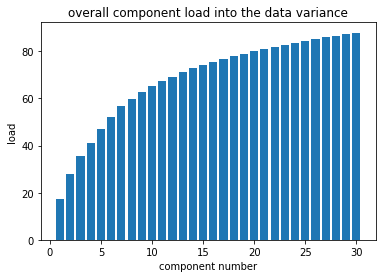

In [107]:
plt.bar(range(1,len(cum_sum) + 1), cum_sum)
plt.title("overall component load into the data variance")
plt.xlabel("component number")
plt.ylabel("load")

In [108]:
X = pca.fit_transform(genes)

In [109]:
X_df = pd.DataFrame(X, index=labels["cancer"])  # here cancer type is used as an index

In [110]:
X_df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
cancer,,,,,,,,,,,,,,,,,,,,,
ALL,-23618.452895,-6940.033189,-17717.054558,-1517.083551,-7625.509298,22393.155119,-9786.991501,-8012.075357,-6717.838096,-4570.549612,...,13716.911089,-3394.177752,-3211.929837,1314.300669,-13664.144705,4579.904230,5612.424372,5617.653679,-2409.406594,436.058847
ALL,-37507.863328,-11478.304190,-21542.966775,-8414.873506,-10153.978799,17870.784475,2197.907987,1301.397620,2946.018408,5062.821915,...,5095.236810,10726.361997,3319.610314,1873.472558,-5144.903481,4240.331092,80.073981,2055.693169,-6320.453558,10901.186036
ALL,30685.426889,-19049.730197,5561.069739,2920.527954,-7108.654382,-9884.364026,3834.989578,-16887.622882,-2928.464866,298.921004,...,4310.344392,-3453.800058,-6171.966181,4298.134158,2983.922653,88.712821,-704.620534,4047.170266,-7891.172621,-4382.212638
ALL,-8912.555617,-10436.645909,-12170.015356,-9224.146224,-5907.468828,-9105.004765,13998.280352,-2760.751993,3848.961479,14870.928502,...,3709.468419,2547.343921,4977.561521,-4816.382524,7649.014687,-2543.447596,-221.877678,2956.077425,-6474.412417,4247.686500
ALL,2324.557465,-14501.367349,-22130.566300,19.266319,-623.209445,-4715.110355,-2717.816788,-5666.502246,5329.579064,11649.457685,...,7845.779298,-20.659366,4056.604167,-2422.414753,-2423.091104,-607.140501,-5589.269441,-1876.103685,-5641.198190,-3050.660129


In [111]:
X_df["patiens"] = range(1,len(labels) + 1)

In [112]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,patiens
cancer,,,,,,,,,,,,,,,,,,,,,
ALL,-12371.342565,-16505.719578,-20498.786218,8262.673020,10721.602523,744.169595,7645.015745,-3149.782258,-7895.179199,-9950.201001,...,7484.028547,-4921.034352,1104.548946,1848.955996,3654.757149,-7214.487838,-1207.508210,-5697.743914,3600.187995,1
ALL,-37565.865562,57.609141,74.289310,21999.172091,-1088.063847,4478.032926,-7902.855892,1943.729962,12137.506696,6392.691652,...,-4803.183763,-156.485698,-7736.864817,-2263.997668,-6616.697214,11022.757888,-915.973652,1708.918260,10706.389164,2
ALL,-19116.366453,-18216.306743,25580.699887,49453.811357,8472.482921,17080.036713,-12062.748400,-7133.004392,14385.235070,-4278.081480,...,-2501.207046,-6534.749849,-4690.100987,821.301617,8172.919188,-3750.795098,1641.515103,4843.750566,3518.788950,3
ALL,-8712.903990,-17386.579473,-1775.273589,7163.991822,6213.368505,-5058.148309,-8023.086165,-2778.123657,-15507.016260,-16829.143895,...,-11876.800804,-5933.857609,-1931.429563,-2753.309910,7.004014,2029.422178,-2366.195680,7992.621094,950.891453,4
ALL,-29690.895592,-12205.169291,3840.712519,-16135.155358,-3986.661205,11519.328127,3321.491209,-5572.975336,-6738.192550,-4699.205181,...,-3248.064643,-3439.786714,-4716.438816,-3933.768224,4389.944589,9850.755692,-7620.660531,7351.402532,3010.248175,5


finding projection which will give the best view:

Text(0.5,1,'PCA')

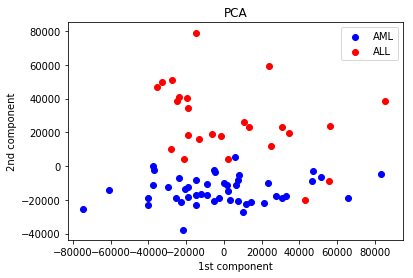

In [113]:
# awkward style of dots labelling, but still it works

plt.scatter(X_df.loc["ALL",0], X_df.loc["ALL",1], c="blue", label="AML")
plt.scatter(X_df.loc["AML",0], X_df.loc["AML",1], c="red", label="ALL")
    
plt.legend()

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.title("PCA")

Text(0.5,1,'PCA')

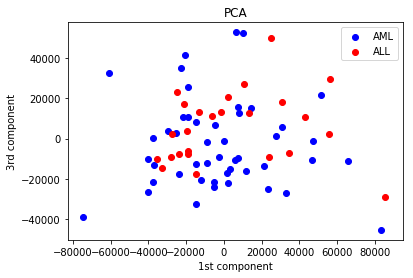

In [114]:
plt.scatter(X_df.loc["ALL",0], X_df.loc["ALL",2], c="blue", label="AML")
plt.scatter(X_df.loc["AML",0], X_df.loc["AML",2], c="red", label="ALL")
    
plt.legend()

plt.xlabel("1st component")
plt.ylabel("3rd component")
plt.title("PCA")

Text(0.5,1,'PCA')

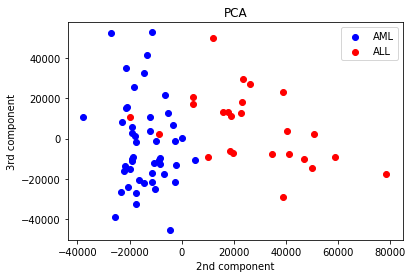

In [115]:
plt.scatter(X_df.loc["ALL",1], X_df.loc["ALL",2], c="blue", label="AML")
plt.scatter(X_df.loc["AML",1], X_df.loc["AML",2], c="red", label="ALL")
    
plt.legend()

plt.xlabel("2nd component")
plt.ylabel("3rd component")
plt.title("PCA")

<IPython.core.display.Javascript object>


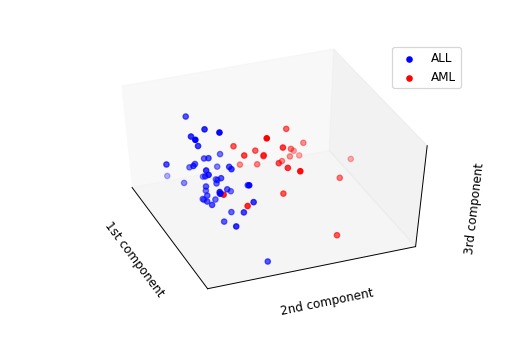

In [117]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig_3D = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter(X_df.loc["ALL",0], X_df.loc["ALL",1], X_df.loc["ALL",2], c="blue", label="ALL")
ax.scatter(X_df.loc["AML",0], X_df.loc["AML",1], X_df.loc["AML",2], c="red", label="AML")

ax.set_xlabel("1st component")
ax.set_ylabel("2nd component")
ax.set_zlabel("3rd component")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])


ax.legend()